In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt_style = {"text.usetex": True,
             "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
             "axes.spines.right" : False,
             "axes.spines.top" : False,
             "font.size": 22,
             "savefig.dpi": 600,
             "savefig.bbox": 'tight'
            }

In [2]:
from scipy.stats import norm
r = norm.rvs(size=5)
print(r)

[ 0.57254529 -0.71561643  0.75115018 -1.24972592  0.11860522]


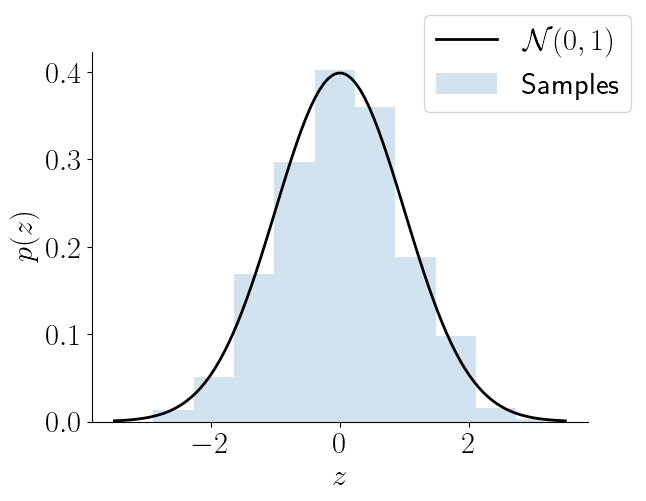

In [3]:
with plt.style.context(plt_style):
    z = np.linspace(-3.5,3.5, 100)
    r = norm.rvs(size=1000)
    rv = norm()
    fig, ax = plt.subplots()
    ax.plot(z, rv.pdf(z), 'k-', lw=2, label=r'$\mathcal{N}(0,1)$')
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label='Samples')
    ax.set_xlabel(r'$z$')
    ax.set_ylabel(r'$p(z)$')
    fig.legend()
    plt.savefig('./figures/lec03_1.pdf')
    plt.show()

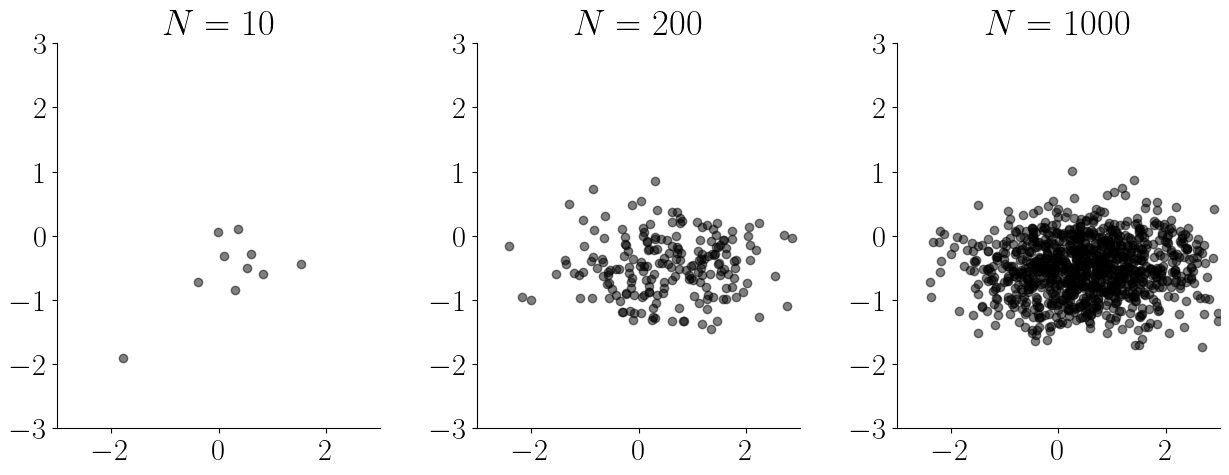

In [22]:
from scipy.stats import multivariate_normal as mvn

dist = mvn([0.5, -0.5], [[1.0, 0.001], [0.001, 0.2]])

with plt.style.context(plt_style):
    fig, axs = plt.subplots(1,3, figsize=(3*5, 5))
    fig.subplots_adjust(wspace=0.3)
    for i, n in enumerate([10,200,1000]):
        s = dist.rvs(size=n)
        axs[i].scatter(s[:,0], s[:,1], color='k', alpha=0.5)
        axs[i].set_xlim([-3,3])
        axs[i].set_ylim([-3,3])
        axs[i].set_title(r'$N = %d$'%n)
    plt.savefig('./figures/lec03_2.pdf')
    plt.show()

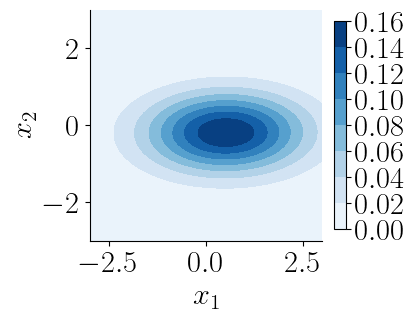

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
p = dist.pdf(pos)
with plt.style.context(plt_style):
    fig, ax = plt.subplots(figsize=(3,3))
    c = ax.contourf(x, y, p, cmap='Blues')
    ax.set_xlabel(r'$x_{1}$')
    ax.set_ylabel(r'$x_{2}$')
    cax = ax.inset_axes([1.05, 0.05, 0.05, 0.9], transform=ax.transAxes)
    fig.colorbar(c, cax=cax)
    plt.savefig('./figures/lec03_3.pdf')
    plt.show()

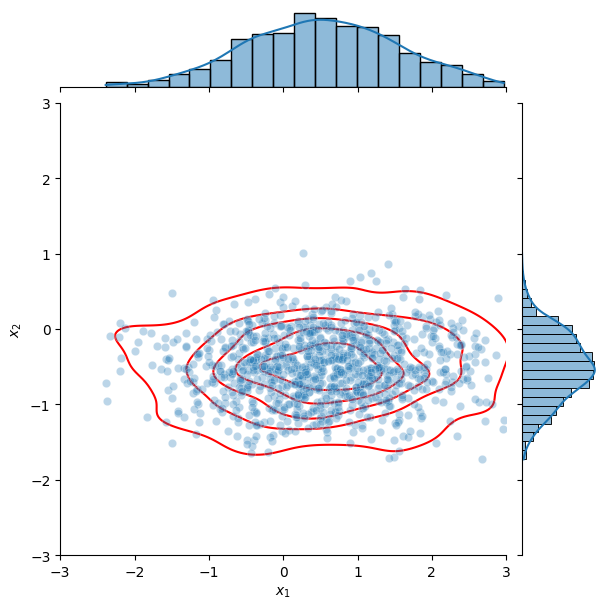

In [39]:
import seaborn as sns

g = sns.JointGrid(x=s[:,0], y=s[:,1])
ax = g.figure.axes[0]
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_xlabel(r'$x_{1}$')
ax.set_ylabel(r'$x_{2}$')
g.plot_joint(sns.scatterplot, alpha=.3)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.histplot, kde=True)
plt.show()